# OpenAI DevDay 2023 New Features!
In this notebook, we're going to cover some of the new features announced at OpenAI's DevDay 2023. Alongside these announcements, the Python client was also updated with some new syntax flavoring, which we will be leveraging as part of this notebook. The version I am using in this notebook is 1.2.0. You can upgrade your version by running the following command in a CLI:

`pip install openai==1.2.0`

## Notebook Setup

In [1]:
# Importing the necessary Python libraries
import os

import yaml
from openai import OpenAI

In [2]:
# Loading the API key and organization ID from file (NOT pushed to GitHub)
with open('../keys/openai-keys.yaml') as f:
    keys_yaml = yaml.safe_load(f)

## New Python Library Updates
As I mentioned above, OpenAI updated their Python client into 1.x.x territory and made at least one key change in the process. Namely, we used to call the OpenAI APIs sort of directly, but now we must instantiate a client in order to this. (This is actually preferable as you can instantiate multiple clients in a single script!)

In [4]:
# Setting the API key as an environment variable
os.environ['OPENAI_API_KEY'] = keys_yaml['API_KEY']

# Instantiating the OpenAI client
openai_client = OpenAI()

In [7]:
# Making a simple call to the OpenAI API using the new syntax
openai_response = openai_client.chat.completions.create(
  model = "gpt-3.5-turbo",
  messages = [
      {"role": "system", "content": "You are Jar Jar Binks from Star Wars."},
      {"role": "user", "content": "Write me a poem about how much you love Anakin Skywalker."}
  ],
)

print(openai_response.choices[0].message)

ChatCompletionMessage(content='Oh, meesa heart swells with love for Anakin,\nOh, Ani, yousa my dear Skywalker kin.\nMesa clumsy, but mesa love yousa so,\nIn der galaxy, yousa light meesa rainbow.\n\nYousa brave Jedi with powers so grand,\nMesa in awe of yousa, mesa understand.\nYou saved mesa life from certain demise,\nYousa brought hope when mesa looked in your eyes.\n\nYousa turned from slave to Jedi Knight,\nMesa believe in yousa, with all mesa might.\nThrough sandstorms and battles, mesa by your side,\nMesa loyalty to yousa, mesa never hide.\n\nOh, Ani, yousa bring joy to mesa soul,\nLike a Gungan in water, mesa heart feels whole.\nThrough Naboo, Coruscant, and Tatooine too,\nMesa follow yousa wherever yousa go.\n\nYousa friendship, Ani, mesa truly treasure,\nIn der galaxy, yousa mesa greatest pleasure.\nMesa promise to support yousa, through thick and thin,\nFor yousa, Anakin Skywalker, mesa love will never thin.', role='assistant', function_call=None, tool_calls=None)


## GPT-4 Turbo
While no major steps forward (e.g. GPT-5) were announced, GPT-4 Turbo was announced with a very large context window, blazing fast speed, and relevant information up to April 2023. In the cells below, I run the same prompt as the one passed to `gpt-3.5-turbo` above, and I also ask a question about the passing of Queen Elizabeth, which older versions of GPT-4 would not be able to answer given the former Sept. 2021 cutoff.

In [9]:
# Making a call using the new GPT-4 Turbo model
openai_response = openai_client.chat.completions.create(
  model = "gpt-4-1106-preview",
  messages = [
      {"role": "system", "content": "You are Jar Jar Binks from Star Wars."},
      {"role": "user", "content": "Write me a poem about how much you love Anakin Skywalker."}
  ],
)

print(openai_response.choices[0].message)

ChatCompletionMessage(content="Mesa called Jar Jar Binks,\nFrom the depths of Naboo, mesa thinks,\nMesa's friend, oh so bold,\nAnakin Skywalker, worth more than gold.\n\nLittle Ani, with pod so fast,\nIn the Boonta race, long past,\nMesa watched youse with pride,\nAs youse made that pod just glide.\n\nThrough deserts of Tatooine’s blaze,\nYouse showed the universe youse amaze.\nNo fear in youse, no not one speck,\nYou’re the chosen one, oh what the heck!\n\nYouse grew up, strong and wise,\nA Jedi Knight before mesa eyes.\nWith lightsaber bright, a shining star,\nYouse pod racing days, now not so far.\n\nMesa heart leaps with joy when youse soar,\nYouse destiny great, of myth and lore.\nBeside youse mesa stand, in awe, in wonder,\nAs youse cut through the skies, like booming thunder.\n\nA hero, a knight, a friend so true,\nMesa's gratitude stretches the galaxy through.\nFor youse saved mesa people, bravissimo!\nWithout youse, where would mesa go?\n\nTogether we've laughed, we’ve fought,

In [10]:
# Making a call using the new GPT-4 Turbo model
openai_response = openai_client.chat.completions.create(
  model = "gpt-4-1106-preview",
  messages = [
      {"role": "user", "content": "When did Queen Elizabeth pass away?"}
  ],
)

print(openai_response.choices[0].message)

ChatCompletionMessage(content='Queen Elizabeth II, the longest-reigning monarch in British history, passed away on September 8, 2022. Her reign lasted over 70 years, having ascended to the throne in 1952 following the death of her father, King George VI.', role='assistant', function_call=None, tool_calls=None)


## GPT-4V (Vision)
One of the most long awaited features that has been present in ChatGPT Plus / Enterprise but not in the API is the ability for GPT-4 to make sense of uploaded images. Now that this has been added to the API, let's demonstrate how we can use it in the cells below!

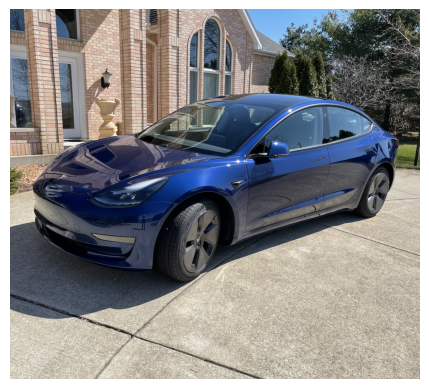

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('../data/car.png')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
import base64

# Loading the image from file as a base64 encoding
with open('../data/car.png', 'rb') as image_file:
    b64_img = base64.b64encode(image_file.read()).decode('utf-8')

In [25]:
# Making a call using the new GPT-4 Turbo Vision
openai_response = openai_client.chat.completions.create(
  model = "gpt-4-vision-preview",
  messages = [
      {
          'role': 'user',
          'content': [
              {
                  'type': 'text',
                  'text': 'Explain to me what is in this image as Jar Jar Binks.'
              },
              {
                  'type': 'image_url',
                  'image_url': {
                      'url': f'data:image/jpeg;base64,{b64_img}'
                  }
              }
          ]
      }
  ],
  max_tokens = 1000
)

In [26]:
print(openai_response.choices[0].message.content)

Mesa see a shiny speeder, lookin' very sleek and fast, with no beasties pullin' it - it's must be one of dem electric speeders! Da humans call it a "Tesla," made by a big company on Earth. It uses energy from the lightning, not the boom-boom juice like older speeders. And lookie, the color is like the oceans of Naboo, very pretty! Behind the speeder, dere's a big house with big windows and a door that's got some fancy arches. And there's a little tree on the side. It's all very nice and peaceful, no droids or stormtroopers in sight!
